In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
if '..' not in sys.path: sys.path.insert(0, '..')
from utils.distribution_utils import compute_probability_distribution
from utils.eval import compute_ngram_distribution, compute_js_divergence, plot_cdf

In [2]:
os.chdir('..')
dataset_dir = './data/raw/'
apps = ['app_11', 'app_49', 'app_131', 'app_147', 'app_182', 'app_199', 'app_207', 'app_212', 'app_265', 'app_275']
size_dir = './data/size/'
interval_dir = './data/interval/'
metadata_dir = './data/metadata/'
size_cdf = pd.read_csv('./data/cdf/size_cdf.csv')
interval_cdf = pd.read_csv('./data/cdf/interval_cdf.csv')
n_size = len(size_cdf) - 1
n_interval = len(interval_cdf) - 1

In [3]:
sizes, intervals = {}, {}
for app in apps:
    size_file = os.path.join(size_dir, '{}.txt'.format(app))
    interval_file = os.path.join(interval_dir, '{}.txt'.format(app))
    sizes[app] = []
    intervals[app] = []
    with open(size_file, 'r') as size_f, \
            open(interval_file, 'r') as interval_f:
        for size_line, interval_line in zip(size_f, interval_f):
            size = np.array(list(map(int, size_line.strip().split(','))))
            interval = np.array(list(map(int, interval_line.strip().split(','))))
            sizes[app].append(size)
            intervals[app].append(interval)
            
sum_traces = 0
sum_flows = 0
for app in apps:
    sum_traces += len(sizes[app])
    sum_flows += np.sum([len(size_seq) for size_seq in sizes[app]])
print('sum_traces={}, sum_flows={}'.format(sum_traces, sum_flows))

sum_traces=2318, sum_flows=377629


Text(0.5, 0, 'Time')

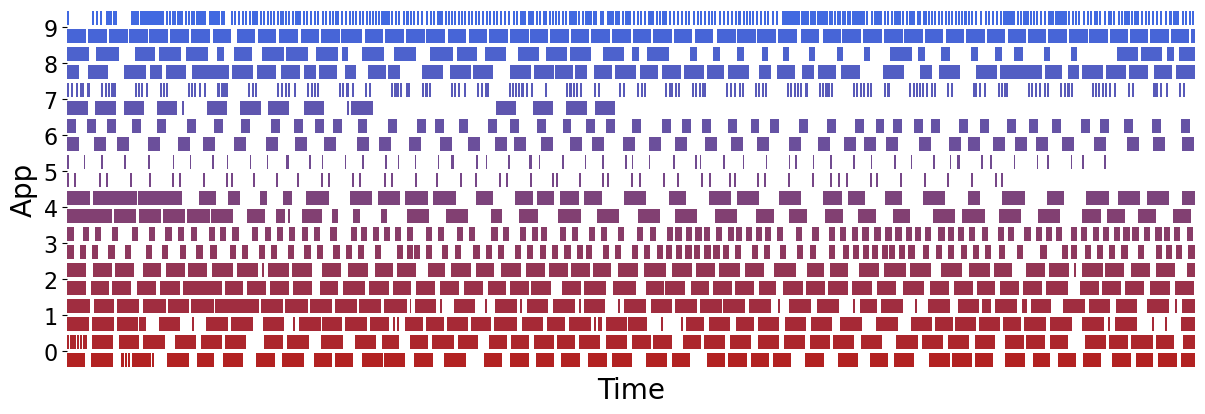

In [4]:
# 定义颜色映射的两端点颜色
colors = ["FireBrick", 'RoyalBlue']

# 创建colormap，指定颜色点数为20
n_colors = 20
cmap_name = 'FireBrickRoyalBlue'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_colors)

fig, ax = plt.subplots(figsize=(12, 4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.subplots_adjust(left=0.05, top=0.98, bottom=0.08, right=0.99)
idx = 0
for app in apps:
    for trace in range(2):
        size = [size_cdf['cdf'][item] for item in sizes[app][trace]]
        interval = [interval_cdf['cdf'][item] for item in intervals[app][trace]]
        start_pos = 0
        for i in range(0, len(size) - 1):
            ax.barh(idx, size[i], left=start_pos, color=cmap(idx), edgecolor=None, height=0.8)
            start_pos += interval[i] + size[i]
            if start_pos > 50:
                break
        idx += 1
ax.set_xlim(0, 50)
ax.set_ylim(-0.5, 19.5)
ax.set_yticks(np.arange(0.5, 20, 2))
ax.set_yticklabels(np.arange(0, 10, 1), fontsize=16)
ax.set_xticks([])
ax.set_ylabel('App', fontsize=20)
ax.set_xlabel('Time', fontsize=20, labelpad=5)
# plt.savefig('./figures/analysis/analysis_sequences.pdf', dpi=600)

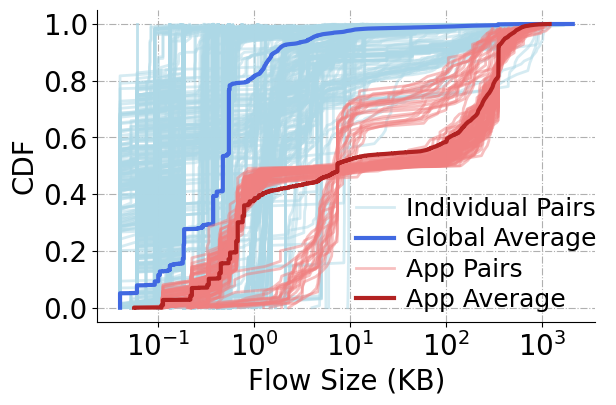

In [5]:
# Setup the figure and axes
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.15, top=0.98, bottom=0.2, right=0.98)
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(2, 7, 1))
ax.set_xticklabels([f"$10^{{%d}}$" % i for i in np.arange(-1, 4, 1)], fontsize=20)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels([f"{i:.1f}" for i in np.arange(0, 1.1, 0.2)], fontsize=20)
ax.set_ylabel('CDF', fontsize=20)
ax.set_xlabel('Flow Size (KB)', fontsize=20)
plt.grid(linestyle='-.')

all_sizes = []
# Process each application's data
for app_idx, app in enumerate(apps):
    if app == 'app_182':
        continue
    app_dir = os.path.join(dataset_dir, app)
    files = os.listdir(app_dir)
    for file_idx, file in enumerate(files):
        data = pd.read_csv(os.path.join(app_dir, file))['size'].values
        all_sizes.extend(data)
        # Only add label for the first file of the first app
        add_label = app_idx == 0 and file_idx == 0
        label = 'Individual Pairs' if add_label else None
        plot_cdf(np.log10(data), label=label, alpha=0.5)

# Plot average CDF
all_sizes = np.log10(all_sizes)
plot_cdf(all_sizes, 'Global Average', color='RoyalBlue', linewidth=3, alpha=1.0)

app = 'app_182'
app_dir = os.path.join(dataset_dir, app)
files = os.listdir(app_dir)
all_sizes = []
for file_idx, file in enumerate(files):
    data = pd.read_csv(os.path.join(app_dir, file))['size'].values
    all_sizes.extend(data)
    add_label = file_idx == 0
    label = 'App Pairs' if add_label else None
    plot_cdf(np.log10(data), label, alpha=0.5, color='LightCoral')
all_sizes = np.log10(all_sizes)
plot_cdf(all_sizes, 'App Average', color='FireBrick', linewidth=3, alpha=1.0)

plt.legend(fontsize=18, frameon=False, loc=(0.5, 0), ncol=1, columnspacing=1.2, labelspacing=0.25, handlelength=1.5, handletextpad=0.5)
plt.savefig('./figures/analysis/analysis_size_distributions.pdf', dpi=600)

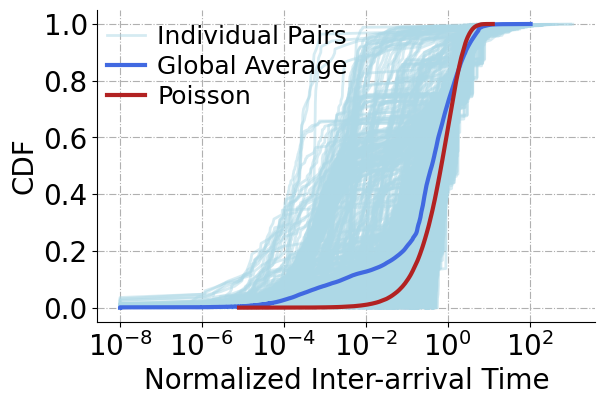

In [6]:
# Setup the figure and axes
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.15, top=0.98, bottom=0.2, right=0.98)
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(-8, 3, 2))
ax.set_xticklabels([f"$10^{{%d}}$" % i for i in np.arange(-8, 3, 2)], fontsize=20)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels([f"{i:.1f}" for i in np.arange(0, 1.1, 0.2)], fontsize=20)
ax.set_ylabel('CDF', fontsize=20)
ax.set_xlabel('Normalized Inter-arrival Time', fontsize=20)
plt.grid(linestyle='-.')

all_intervals = []
# Process each application's data
for app_idx, app in enumerate(apps):
    app_dir = os.path.join(dataset_dir, app)
    files = os.listdir(app_dir)
    for file_idx, file in enumerate(files):
        data = pd.read_csv(os.path.join(app_dir, file))['time'].values
        intervals_ = np.diff(data)
        all_intervals.extend(intervals_)
        intervals_ = intervals_ / np.mean(intervals_)
        intervals_[intervals_ == 0] = 1e-8
        # Only add label for the first file of the first app
        add_label = app_idx == 0 and file_idx == 0
        label = 'Individual Pairs' if add_label else None
        if add_label:
            individual_line = plot_cdf(np.log10(intervals_), label, alpha=0.5)
        else:
            plot_cdf(np.log10(intervals_), label=None, alpha=0.5)

# Plot average CDF
all_intervals = np.array(all_intervals)
all_intervals = all_intervals / np.mean(all_intervals)
all_intervals[all_intervals == 0] = 1e-8
average_line = plot_cdf(np.log10(all_intervals), 'Global Average', color='RoyalBlue', linewidth=3, alpha=1.0)

# plot poisson CDF
poisson_intervals = np.random.exponential(1, len(all_intervals))
poisson_line = plot_cdf(np.log10(poisson_intervals), 'Poisson', color='FireBrick', linewidth=3, alpha=1.0)

plt.legend(fontsize=18, frameon=False, loc=(0, 0.65), ncol=1, columnspacing=1.2, labelspacing=0.25, handlelength=1.5, handletextpad=0.5)
plt.savefig('./figures/analysis/analysis_interval_distributions.pdf', dpi=600)

In [12]:
for app in apps:
    n_gram_jsds = {n:[] for n in [2, 3, 4]}
    for seq in sizes[app]:
        n_gram_dist = {'ori': {}, 'permuted': {}}
        permuted_seq = np.random.permutation(seq)
        for n in [2, 3, 4]:
            n_gram_dist['ori'][n] = compute_ngram_distribution(seq, n)
            n_gram_dist['permuted'][n] = compute_ngram_distribution(permuted_seq, n)
            n_gram_jsds[n].append(compute_js_divergence(n_gram_dist['ori'][n], n_gram_dist['permuted'][n]))    

    print('{}, {:.3f}/{:.3f}, {:.3f}/{:.3f}, {:.3f}/{:.3f}'.format(app, np.mean(n_gram_jsds[2]), np.std(n_gram_jsds[2]), np.mean(n_gram_jsds[3]), np.std(n_gram_jsds[3]), np.mean(n_gram_jsds[4]), np.std(n_gram_jsds[4])))    

app_11, 0.249/0.092, 0.678/0.187, 0.888/0.220
app_49, 0.396/0.185, 0.615/0.224, 0.738/0.218
app_131, 0.169/0.055, 0.536/0.098, 0.869/0.061
app_147, 0.038/0.086, 0.088/0.178, 0.132/0.243
app_182, 0.788/0.090, 0.977/0.030, 0.997/0.008
app_199, 0.011/0.023, 0.035/0.066, 0.077/0.135
app_207, 0.001/0.002, 0.003/0.005, 0.005/0.008
app_212, 0.135/0.163, 0.219/0.257, 0.280/0.324
app_265, 0.331/0.279, 0.526/0.414, 0.595/0.451
app_275, 0.191/0.136, 0.330/0.220, 0.435/0.263


In [13]:
for app in apps:
    jsds = []
    for size_seq, interval_seq in zip(sizes[app], intervals[app]):
        ori_pairs = list(zip(size_seq[:-1], interval_seq[:-1]))
        permuted_interval_seq = np.random.permutation(interval_seq[:-1])
        permuted_pairs = list(zip(size_seq[:-1], permuted_interval_seq))
        ori_dist = {pair: 0 for pair in ori_pairs}
        for pair in ori_pairs:
            ori_dist[pair] += 1
        ori_dist = {pair: count / len(ori_pairs) for pair, count in ori_dist.items()}
        permuted_dist = {pair: 0 for pair in permuted_pairs}
        for pair in permuted_pairs:
            permuted_dist[pair] += 1
        permuted_dist = {pair: count / len(permuted_pairs) for pair, count in permuted_dist.items()}
        jsd = compute_js_divergence(ori_dist, permuted_dist)
        jsds.append(jsd)
    jsds = np.array(jsds)
    print('{}, {:.3f}, {:.3f}'.format(app, np.mean(jsds), np.std(jsds)))

app_11, 0.510, 0.124
app_49, 0.500, 0.145
app_131, 0.349, 0.040
app_147, 0.132, 0.189
app_182, 0.871, 0.051
app_199, 0.138, 0.164
app_207, 0.008, 0.012
app_212, 0.197, 0.229
app_265, 0.491, 0.368
app_275, 0.207, 0.107
